## importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## reading the explored data

In [2]:
df= pd.read_csv('./df_explored.csv')

In [4]:
df.head()

,Day,VehicleJourneyRef,DestinationAimedArrivalTime,JourneyCode,FromStopID,ToStopID,AimedDepartureTime,AimedArrivalTime,ActualDepartureTime,ActualArrivalTime,RouteID,TravelTime,ArrivalDifference,DepartureDifference,HourOfDay,ArrivalHour
0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,260007454,260007423,2024-08-21 06:36:00,2024-08-21 06:36:00,2024-08-21 06:26:33,2024-08-21 06:35:51,1:1_1_2147483284,9.30,-0.150000,-9.450000,6,6
1,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,260007423,260007343,2024-08-21 06:36:00,2024-08-21 06:37:00,2024-08-21 06:35:51,2024-08-21 06:37:42,1:1_2_2147483283,1.85,0.700000,-0.150000,6,6
2,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,260007454,260007423,2024-08-21 08:56:00,2024-08-21 08:56:00,2024-08-21 08:51:41,2024-08-21 08:57:05,1:1_1_2147483284,5.40,1.083333,-4.316667,8,8
3,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,260007423,260007343,2024-08-21 08:56:00,2024-08-21 08:57:00,2024-08-21 08:57:05,2024-08-21 08:59:23,1:1_2_2147483283,2.30,2.383333,1.083333,8,8
4,Wednesday,NT1-In-1001-NT260007454-2024-08-21T11:14:00-20...,11:15:00,1081.0,260007454,260007423,2024-08-21 11:14:00,2024-08-21 11:14:00,2024-08-21 11:06:27,2024-08-21 11:06:27,1:1_1_2147483284,0.00,-7.550000,-7.550000,11,11


In [5]:
print(df.columns)

Index(['Day', 'VehicleJourneyRef', 'DestinationAimedArrivalTime',
       'JourneyCode', 'FromStopID', 'ToStopID', 'AimedDepartureTime',
       'AimedArrivalTime', 'ActualDepartureTime', 'ActualArrivalTime',
       'RouteID', 'TravelTime', 'ArrivalDifference', 'DepartureDifference',
       'HourOfDay', 'ArrivalHour'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Day                          1771 non-null   object 
 1   VehicleJourneyRef            1771 non-null   object 
 2   DestinationAimedArrivalTime  1771 non-null   object 
 3   JourneyCode                  1771 non-null   float64
 4   FromStopID                   1771 non-null   object 
 5   ToStopID                     1771 non-null   object 
 6   AimedDepartureTime           1771 non-null   object 
 7   AimedArrivalTime             1771 non-null   object 
 8   ActualDepartureTime          1771 non-null   object 
 9   ActualArrivalTime            1771 non-null   object 
 10  RouteID                      1771 non-null   object 
 11  TravelTime                   1771 non-null   float64
 12  ArrivalDifference            1771 non-null   float64
 13  DepartureDifferenc

In [7]:
# Check the data type of the 'Day' column
print(type(df['Day'][0]))


<class 'str'>


In [8]:
print(df['ActualDepartureTime'][0])

2024-08-21 06:26:33


In [9]:
print(type(df['ActualDepartureTime'][0]))

<class 'str'>


## Obtaining Time-based features

In [10]:
#Obtaining Time-based features
df['ActualDepartureTime'] = pd.to_datetime(df['ActualDepartureTime'])

df['DepartureHour'] = df['ActualDepartureTime'].dt.hour
df['IsWeekend'] = df['Day'].apply(lambda x:1 if x in ['Saturday','Sunday'] else 0)

In [11]:
df.head()

,Day,VehicleJourneyRef,DestinationAimedArrivalTime,JourneyCode,FromStopID,ToStopID,AimedDepartureTime,AimedArrivalTime,ActualDepartureTime,ActualArrivalTime,RouteID,TravelTime,ArrivalDifference,DepartureDifference,HourOfDay,ArrivalHour,DepartureHour,IsWeekend
0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,260007454,260007423,2024-08-21 06:36:00,2024-08-21 06:36:00,2024-08-21 06:26:33,2024-08-21 06:35:51,1:1_1_2147483284,9.30,-0.150000,-9.450000,6,6,6,0
1,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,260007423,260007343,2024-08-21 06:36:00,2024-08-21 06:37:00,2024-08-21 06:35:51,2024-08-21 06:37:42,1:1_2_2147483283,1.85,0.700000,-0.150000,6,6,6,0
2,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,260007454,260007423,2024-08-21 08:56:00,2024-08-21 08:56:00,2024-08-21 08:51:41,2024-08-21 08:57:05,1:1_1_2147483284,5.40,1.083333,-4.316667,8,8,8,0
3,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,260007423,260007343,2024-08-21 08:56:00,2024-08-21 08:57:00,2024-08-21 08:57:05,2024-08-21 08:59:23,1:1_2_2147483283,2.30,2.383333,1.083333,8,8,8,0
4,Wednesday,NT1-In-1001-NT260007454-2024-08-21T11:14:00-20...,11:15:00,1081.0,260007454,260007423,2024-08-21 11:14:00,2024-08-21 11:14:00,2024-08-21 11:06:27,2024-08-21 11:06:27,1:1_1_2147483284,0.00,-7.550000,-7.550000,11,11,11,0


In [12]:
df['HourDayInteraction'] = df['ArrivalHour'].astype(str) + '_' + df['Day'].astype(str)
df['AvgTravelTimeByJourney'] = df.groupby(['JourneyCode', 'VehicleJourneyRef'])['TravelTime'].transform('mean')


In [13]:
df.head()

,Day,VehicleJourneyRef,DestinationAimedArrivalTime,JourneyCode,FromStopID,ToStopID,AimedDepartureTime,AimedArrivalTime,ActualDepartureTime,ActualArrivalTime,RouteID,TravelTime,ArrivalDifference,DepartureDifference,HourOfDay,ArrivalHour,DepartureHour,IsWeekend,HourDayInteraction,AvgTravelTimeByJourney
0,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,260007454,260007423,2024-08-21 06:36:00,2024-08-21 06:36:00,2024-08-21 06:26:33,2024-08-21 06:35:51,1:1_1_2147483284,9.30,-0.150000,-9.450000,6,6,6,0,6_Wednesday,5.575000
1,Wednesday,NT1-In-1001-NT260007454-2024-08-21T06:36:00-20...,06:37:00,1021.0,260007423,260007343,2024-08-21 06:36:00,2024-08-21 06:37:00,2024-08-21 06:35:51,2024-08-21 06:37:42,1:1_2_2147483283,1.85,0.700000,-0.150000,6,6,6,0,6_Wednesday,5.575000
2,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,260007454,260007423,2024-08-21 08:56:00,2024-08-21 08:56:00,2024-08-21 08:51:41,2024-08-21 08:57:05,1:1_1_2147483284,5.40,1.083333,-4.316667,8,8,8,0,8_Wednesday,3.850000
3,Wednesday,NT1-In-1001-NT260007454-2024-08-21T08:56:00-20...,08:57:00,1053.0,260007423,260007343,2024-08-21 08:56:00,2024-08-21 08:57:00,2024-08-21 08:57:05,2024-08-21 08:59:23,1:1_2_2147483283,2.30,2.383333,1.083333,8,8,8,0,8_Wednesday,3.850000
4,Wednesday,NT1-In-1001-NT260007454-2024-08-21T11:14:00-20...,11:15:00,1081.0,260007454,260007423,2024-08-21 11:14:00,2024-08-21 11:14:00,2024-08-21 11:06:27,2024-08-21 11:06:27,1:1_1_2147483284,0.00,-7.550000,-7.550000,11,11,11,0,11_Wednesday,5.041667


In [14]:
print(df.columns)

Index(['Day', 'VehicleJourneyRef', 'DestinationAimedArrivalTime',
       'JourneyCode', 'FromStopID', 'ToStopID', 'AimedDepartureTime',
       'AimedArrivalTime', 'ActualDepartureTime', 'ActualArrivalTime',
       'RouteID', 'TravelTime', 'ArrivalDifference', 'DepartureDifference',
       'HourOfDay', 'ArrivalHour', 'DepartureHour', 'IsWeekend',
       'HourDayInteraction', 'AvgTravelTimeByJourney'],
      dtype='object')


In [15]:
df_features_columns = ['DestinationAimedArrivalTime', 'JourneyCode',	'FromStopID', 'ToStopID', 'AimedDepartureTime',
       'AimedArrivalTime', 'ActualDepartureTime', 'ActualArrivalTime',
       'TravelTime', 'ArrivalDifference', 'DepartureDifference', 'HourOfDay',
       'ArrivalHour', 'DepartureHour', 'IsWeekend', 'HourDayInteraction',
       'AvgTravelTimeByJourney']

df_features = df[df_features_columns]

Feature Engineering continued for Train data

In [16]:
df_features.head()

,DestinationAimedArrivalTime,JourneyCode,FromStopID,ToStopID,AimedDepartureTime,AimedArrivalTime,ActualDepartureTime,ActualArrivalTime,TravelTime,ArrivalDifference,DepartureDifference,HourOfDay,ArrivalHour,DepartureHour,IsWeekend,HourDayInteraction,AvgTravelTimeByJourney
0,06:37:00,1021.0,260007454,260007423,2024-08-21 06:36:00,2024-08-21 06:36:00,2024-08-21 06:26:33,2024-08-21 06:35:51,9.30,-0.150000,-9.450000,6,6,6,0,6_Wednesday,5.575000
1,06:37:00,1021.0,260007423,260007343,2024-08-21 06:36:00,2024-08-21 06:37:00,2024-08-21 06:35:51,2024-08-21 06:37:42,1.85,0.700000,-0.150000,6,6,6,0,6_Wednesday,5.575000
2,08:57:00,1053.0,260007454,260007423,2024-08-21 08:56:00,2024-08-21 08:56:00,2024-08-21 08:51:41,2024-08-21 08:57:05,5.40,1.083333,-4.316667,8,8,8,0,8_Wednesday,3.850000
3,08:57:00,1053.0,260007423,260007343,2024-08-21 08:56:00,2024-08-21 08:57:00,2024-08-21 08:57:05,2024-08-21 08:59:23,2.30,2.383333,1.083333,8,8,8,0,8_Wednesday,3.850000
4,11:15:00,1081.0,260007454,260007423,2024-08-21 11:14:00,2024-08-21 11:14:00,2024-08-21 11:06:27,2024-08-21 11:06:27,0.00,-7.550000,-7.550000,11,11,11,0,11_Wednesday,5.041667


## Correlation matrix including TravelTime

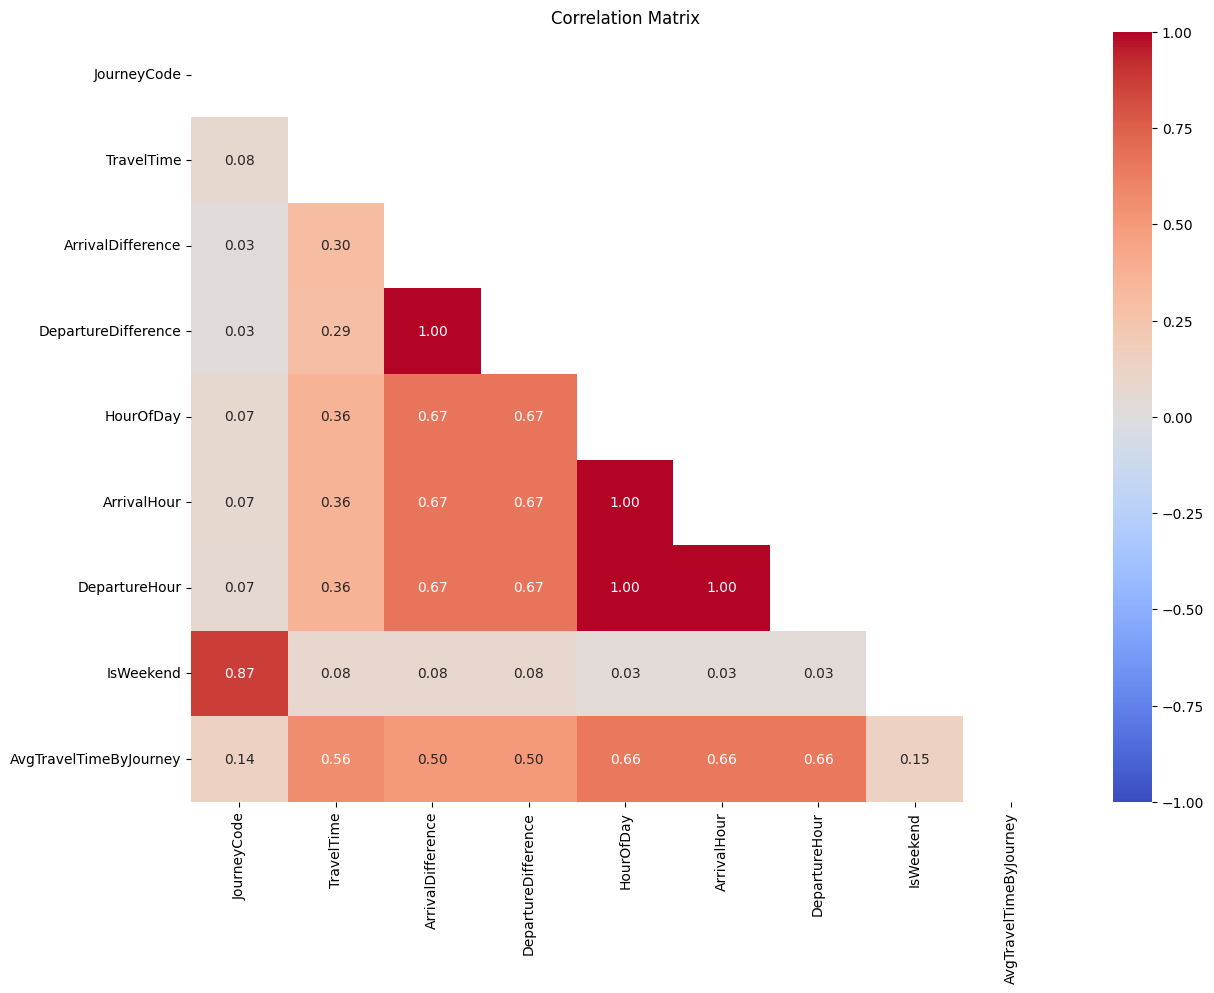

In [17]:
numeric_df = df_features.select_dtypes(include=['number'])
# Calculate the correlation matrix for the numeric features
corrMat = numeric_df.corr()

# mask to hide the upper triangle of the heatmap
mask = np.zeros_like(corrMat, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corrMat, vmin=-1, vmax=1, annot=True, mask=mask, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [18]:
# 'TravelTime' as the target variable
target_variable = 'TravelTime'

# Get the correlation values for the target variable, excluding the target itself
corr_with_target = corrMat[target_variable].drop(target_variable)


# threshold for  "important" correlation
threshold = 0.5

# Filter features that have an absolute correlation greater than the threshold
important_features = corr_with_target[abs(corr_with_target) > threshold]

# Print important features and their correlations
print("Important Features correlated with TravelTime:")
print(important_features)


Important Features correlated with TravelTime:
AvgTravelTimeByJourney    0.557183
Name: TravelTime, dtype: float64


In [19]:
import sklearn
print(sklearn.__version__)


1.5.1


## Principal Component Analysis

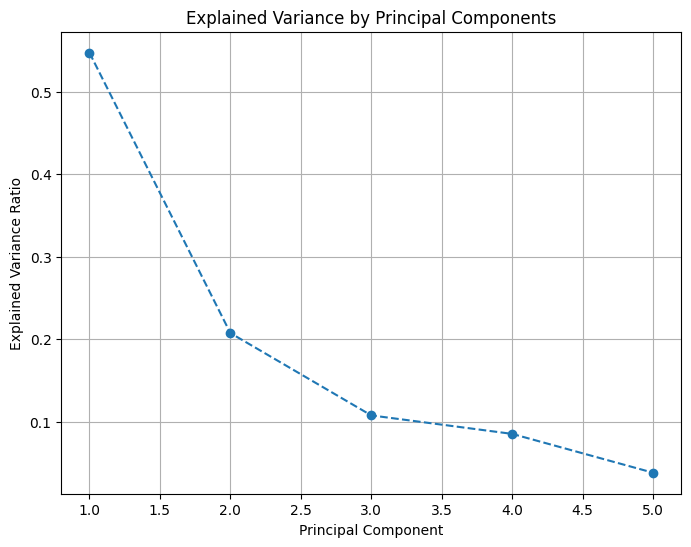

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



X = numeric_df  # Features

y = df['TravelTime'] # Target variable

# Standardize  features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Analyze the explained variance
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Concatenate with the target variable 
pca_df = pd.concat([pca_df, y.reset_index(drop=True)], axis=1)

# pca_df now contains the principal components and can be used for further analysis 


The elbow appears to occur around the 2nd and 3rd principal component. Up to this point, adding more components significantly increases the explained variance. After the 2nd component, the additional explained variance from adding more components decreases significantly. Retaining the first 3 principal components. These components capture most of the variance in the data

In [21]:
# Get the principal component loadings
loadings = pca.components_

# Creating a DataFrame for loadings
# Rows are features, columns are principal components
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=X.columns)

# Display the loadings
print(loadings_df)

                             PC1       PC2       PC3       PC4       PC5
JourneyCode             0.056957  0.697825 -0.061583 -0.105463 -0.090962
TravelTime              0.225904  0.059917  0.737659  0.422519 -0.471761
ArrivalDifference       0.376227 -0.053114 -0.367385  0.464762  0.007825
DepartureDifference     0.375569 -0.053563 -0.372276  0.463111  0.010245
HourOfDay               0.424821 -0.060320 -0.014720 -0.353699 -0.147016
ArrivalHour             0.424821 -0.060320 -0.014720 -0.353699 -0.147016
DepartureHour           0.424559 -0.061286 -0.017621 -0.355950 -0.141540
IsWeekend               0.057509  0.698502 -0.102971  0.044520  0.011398
AvgTravelTimeByJourney  0.344414  0.069445  0.408850  0.031506  0.840006


Important findings from PCA
1. HourOfDay (or one of the similar features: ArrivalHour, DepartureHour)
Reason: High contribution in PC1. Arrival hour and Departure hours are likely to be highly correlated.

2. DepartureDifference
Reason: High contribution in PC2, capturing variations in departure times.

3. ArrivalDifference
Reason: High contributions in both PC2 and PC4, capturing variations in arrival times.

4. JourneyCode
Reason: High contribution in PC3, capturing variance related to different journeys.

5. IsWeekend
Reason: High contribution in PC3, important for capturing weekly patterns.

6. AvgTravelTimeByJourney
Reason: Very high contribution in PC5, important for understanding journey-specific patterns.

In [22]:
numeric_df

,JourneyCode,TravelTime,ArrivalDifference,DepartureDifference,HourOfDay,ArrivalHour,DepartureHour,IsWeekend,AvgTravelTimeByJourney
0,1021.0,9.300000,-0.150000,-9.450000,6,6,6,0,5.575000
1,1021.0,1.850000,0.700000,-0.150000,6,6,6,0,5.575000
2,1053.0,5.400000,1.083333,-4.316667,8,8,8,0,3.850000
3,1053.0,2.300000,2.383333,1.083333,8,8,8,0,3.850000
4,1081.0,0.000000,-7.550000,-7.550000,11,11,11,0,5.041667
...,...,...,...,...,...,...,...,...,...
1766,1046.0,2.800000,2.400000,0.600000,9,9,9,0,1.358333
1767,1046.0,0.000000,0.400000,2.400000,9,9,9,0,1.358333
1768,1046.0,1.583333,1.983333,0.400000,9,9,9,0,1.358333
1769,1046.0,0.583333,1.566667,1.983333,9,9,9,0,1.358333


In [23]:
df = numeric_df

In [24]:
df.head()

,JourneyCode,TravelTime,ArrivalDifference,DepartureDifference,HourOfDay,ArrivalHour,DepartureHour,IsWeekend,AvgTravelTimeByJourney
0,1021.0,9.30,-0.150000,-9.450000,6,6,6,0,5.575000
1,1021.0,1.85,0.700000,-0.150000,6,6,6,0,5.575000
2,1053.0,5.40,1.083333,-4.316667,8,8,8,0,3.850000
3,1053.0,2.30,2.383333,1.083333,8,8,8,0,3.850000
4,1081.0,0.00,-7.550000,-7.550000,11,11,11,0,5.041667


In [25]:
#adding a new column as a unique identifier  
df.insert(0, 'id', range(1, len(df)+1))
df = df[['id'] + [col for col in df.columns if col != 'id']]
df.head()

,id,JourneyCode,TravelTime,ArrivalDifference,DepartureDifference,HourOfDay,ArrivalHour,DepartureHour,IsWeekend,AvgTravelTimeByJourney
0,1,1021.0,9.30,-0.150000,-9.450000,6,6,6,0,5.575000
1,2,1021.0,1.85,0.700000,-0.150000,6,6,6,0,5.575000
2,3,1053.0,5.40,1.083333,-4.316667,8,8,8,0,3.850000
3,4,1053.0,2.30,2.383333,1.083333,8,8,8,0,3.850000
4,5,1081.0,0.00,-7.550000,-7.550000,11,11,11,0,5.041667


In [26]:
df.to_csv('./engineered_data.csv', index = False)

## Preprocessing test data


In [33]:
#Adding necessary feature to the test data
test_df = pd.read_csv('./test_data.csv')
test_df.head()

,LineRef,BlockRef,Day,VehicleJourneyRef,DestinationAimedArrivalTime,JourneyCode,FromStopID,FromStopLocation,ToStopID,ToStopLocation,...,ActualArrivalDateTime,DepartureDate,ArrivalDate,TravelTime,TravelTimeInSeconds,ArrivalDifference,DepartureDifference,HourOfDay,DayOfWeek,ArrivalHour
0,NT1,1001.0,Thursday,NT1-In-1001-NT260007454-2024-08-29T08:56:00-20...,08:57:00,1053.0,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",260007423,"(-1.202979, 52.7731152)",...,2024-08-29 08:57:48+01:00,2024-08-29,2024-08-29,3.200000,192.0,1.800000,-1.400000,8,Thursday,8
1,NT1,1001.0,Thursday,NT1-In-1001-NT260007454-2024-08-29T08:56:00-20...,08:57:00,1053.0,260007423,"(-1.202979, 52.7731152)",260007343,"(-1.1997359, 52.7754058)",...,2024-08-29 08:59:49+01:00,2024-08-29,2024-08-29,2.016667,121.0,2.816667,1.800000,8,Thursday,8
2,NT1,1001.0,Thursday,NT1-In-1001-NT260007454-2024-08-29T11:14:00-20...,11:15:00,1081.0,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",260007423,"(-1.202979, 52.7731152)",...,2024-08-29 11:14:32+01:00,2024-08-29,2024-08-29,4.383333,263.0,0.533333,-3.850000,11,Thursday,11
3,NT1,1001.0,Thursday,NT1-In-1001-NT260007454-2024-08-29T11:14:00-20...,11:15:00,1081.0,260007423,"(-1.202979, 52.7731152)",260007343,"(-1.1997359, 52.7754058)",...,2024-08-29 11:15:16+01:00,2024-08-29,2024-08-29,0.733333,44.0,0.266667,0.533333,11,Thursday,11
4,NT1,1001.0,Thursday,NT1-In-1001-NT260007454-2024-08-29T13:34:00-20...,13:35:00,1109.0,260007454,"(np.float64(-1.2052472), np.float64(52.7720907))",260007423,"(-1.202979, 52.7731152)",...,2024-08-29 13:37:52+01:00,2024-08-29,2024-08-29,9.700000,582.0,3.866667,-5.833333,13,Thursday,13


In [34]:

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LineRef                      992 non-null    object 
 1   BlockRef                     992 non-null    float64
 2   Day                          992 non-null    object 
 3   VehicleJourneyRef            992 non-null    object 
 4   DestinationAimedArrivalTime  992 non-null    object 
 5   JourneyCode                  992 non-null    float64
 6   FromStopID                   992 non-null    object 
 7   FromStopLocation             992 non-null    object 
 8   ToStopID                     992 non-null    object 
 9   ToStopLocation               992 non-null    object 
 10  AimedDepartureTime           992 non-null    object 
 11  AimedArrivalTime             992 non-null    object 
 12  ActualDepartureTime          992 non-null    object 
 13  ActualArrivalTime   

In [35]:
test_df = test_df.drop(['LineRef', 'BlockRef', 'FromStopLocation','ToStopLocation', 'ActualArrivalDateTime','ActualDepartureDateTime', 'DepartureDate','DayOfWeek',
       'ArrivalDate', 'TravelTimeInSeconds'], axis =1)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Day                          992 non-null    object 
 1   VehicleJourneyRef            992 non-null    object 
 2   DestinationAimedArrivalTime  992 non-null    object 
 3   JourneyCode                  992 non-null    float64
 4   FromStopID                   992 non-null    object 
 5   ToStopID                     992 non-null    object 
 6   AimedDepartureTime           992 non-null    object 
 7   AimedArrivalTime             992 non-null    object 
 8   ActualDepartureTime          992 non-null    object 
 9   ActualArrivalTime            992 non-null    object 
 10  RouteID                      992 non-null    object 
 11  TravelTime                   992 non-null    float64
 12  ArrivalDifference            992 non-null    float64
 13  DepartureDifference 

In [36]:
#Obtaining Time-based features
test_df['ActualDepartureTime'] = pd.to_datetime(test_df['ActualDepartureTime'])

test_df['DepartureHour'] = test_df['ActualDepartureTime'].dt.hour
test_df['IsWeekend'] = test_df['Day'].apply(lambda x:1 if x in ['Saturday','Sunday'] else 0)
test_df['AvgTravelTimeByJourney'] = test_df.groupby(['JourneyCode', 'VehicleJourneyRef'])['TravelTime'].transform('mean')
test_df.head()

,Day,VehicleJourneyRef,DestinationAimedArrivalTime,JourneyCode,FromStopID,ToStopID,AimedDepartureTime,AimedArrivalTime,ActualDepartureTime,ActualArrivalTime,RouteID,TravelTime,ArrivalDifference,DepartureDifference,HourOfDay,ArrivalHour,DepartureHour,IsWeekend,AvgTravelTimeByJourney
0,Thursday,NT1-In-1001-NT260007454-2024-08-29T08:56:00-20...,08:57:00,1053.0,260007454,260007423,2024-08-29 08:56:00,2024-08-29 08:56:00,2024-08-29 08:54:36,2024-08-29 08:57:48,1:1_1_2147483284,3.200000,1.800000,-1.400000,8,8,8,0,2.608333
1,Thursday,NT1-In-1001-NT260007454-2024-08-29T08:56:00-20...,08:57:00,1053.0,260007423,260007343,2024-08-29 08:56:00,2024-08-29 08:57:00,2024-08-29 08:57:48,2024-08-29 08:59:49,1:1_2_2147483283,2.016667,2.816667,1.800000,8,8,8,0,2.608333
2,Thursday,NT1-In-1001-NT260007454-2024-08-29T11:14:00-20...,11:15:00,1081.0,260007454,260007423,2024-08-29 11:14:00,2024-08-29 11:14:00,2024-08-29 11:10:09,2024-08-29 11:14:32,1:1_1_2147483284,4.383333,0.533333,-3.850000,11,11,11,0,2.558333
3,Thursday,NT1-In-1001-NT260007454-2024-08-29T11:14:00-20...,11:15:00,1081.0,260007423,260007343,2024-08-29 11:14:00,2024-08-29 11:15:00,2024-08-29 11:14:32,2024-08-29 11:15:16,1:1_2_2147483283,0.733333,0.266667,0.533333,11,11,11,0,2.558333
4,Thursday,NT1-In-1001-NT260007454-2024-08-29T13:34:00-20...,13:35:00,1109.0,260007454,260007423,2024-08-29 13:34:00,2024-08-29 13:34:00,2024-08-29 13:28:10,2024-08-29 13:37:52,1:1_1_2147483284,9.700000,3.866667,-5.833333,13,13,13,0,5.475000


In [38]:
#adding a new column as a unique identifier  
test_df.insert(0, 'id', range(1, len(test_df)+1))
test_df = test_df[['id'] + [col for col in test_df.columns if col != 'id']]
test_df.head()

,id,Day,VehicleJourneyRef,DestinationAimedArrivalTime,JourneyCode,FromStopID,ToStopID,AimedDepartureTime,AimedArrivalTime,ActualDepartureTime,ActualArrivalTime,RouteID,TravelTime,ArrivalDifference,DepartureDifference,HourOfDay,ArrivalHour,DepartureHour,IsWeekend,AvgTravelTimeByJourney
0,1,Thursday,NT1-In-1001-NT260007454-2024-08-29T08:56:00-20...,08:57:00,1053.0,260007454,260007423,2024-08-29 08:56:00,2024-08-29 08:56:00,2024-08-29 08:54:36,2024-08-29 08:57:48,1:1_1_2147483284,3.200000,1.800000,-1.400000,8,8,8,0,2.608333
1,2,Thursday,NT1-In-1001-NT260007454-2024-08-29T08:56:00-20...,08:57:00,1053.0,260007423,260007343,2024-08-29 08:56:00,2024-08-29 08:57:00,2024-08-29 08:57:48,2024-08-29 08:59:49,1:1_2_2147483283,2.016667,2.816667,1.800000,8,8,8,0,2.608333
2,3,Thursday,NT1-In-1001-NT260007454-2024-08-29T11:14:00-20...,11:15:00,1081.0,260007454,260007423,2024-08-29 11:14:00,2024-08-29 11:14:00,2024-08-29 11:10:09,2024-08-29 11:14:32,1:1_1_2147483284,4.383333,0.533333,-3.850000,11,11,11,0,2.558333
3,4,Thursday,NT1-In-1001-NT260007454-2024-08-29T11:14:00-20...,11:15:00,1081.0,260007423,260007343,2024-08-29 11:14:00,2024-08-29 11:15:00,2024-08-29 11:14:32,2024-08-29 11:15:16,1:1_2_2147483283,0.733333,0.266667,0.533333,11,11,11,0,2.558333
4,5,Thursday,NT1-In-1001-NT260007454-2024-08-29T13:34:00-20...,13:35:00,1109.0,260007454,260007423,2024-08-29 13:34:00,2024-08-29 13:34:00,2024-08-29 13:28:10,2024-08-29 13:37:52,1:1_1_2147483284,9.700000,3.866667,-5.833333,13,13,13,0,5.475000


In [39]:
test_df = test_df.drop(['Day', 'VehicleJourneyRef', 'DestinationAimedArrivalTime', 'FromStopID', 'ToStopID', 'AimedDepartureTime','AimedArrivalTime', 'ActualDepartureTime', 'ActualArrivalTime', 'RouteID', ], axis=1)
test_df.head()

,id,JourneyCode,TravelTime,ArrivalDifference,DepartureDifference,HourOfDay,ArrivalHour,DepartureHour,IsWeekend,AvgTravelTimeByJourney
0,1,1053.0,3.200000,1.800000,-1.400000,8,8,8,0,2.608333
1,2,1053.0,2.016667,2.816667,1.800000,8,8,8,0,2.608333
2,3,1081.0,4.383333,0.533333,-3.850000,11,11,11,0,2.558333
3,4,1081.0,0.733333,0.266667,0.533333,11,11,11,0,2.558333
4,5,1109.0,9.700000,3.866667,-5.833333,13,13,13,0,5.475000


In [ ]:
test_df.to_csv('./Updated_test_data.csv', index = False)